In [ ]:
!python -m pip install matplotlib ipywidgets ipympl vector3d

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
point = np.array([[10.,10.,10.]]).T
h_point = np.array([[10.,10.,10.,1]]).T


In [ ]:
def plot(init, trans):
    fig = plt.figure()
    ax=fig.add_subplot(111, projection='3d')
    ax.scatter(init[0], init[1], init[2], marker='^', label="initial")
    ax.scatter(trans[0], trans[1], trans[2], marker='o', label="transformed")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    plt.legend(loc="upper right")
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)
    ax.set_zlim(-50, 50)

    plt.show()

# def plot_frame(init, trans):
#     # line

def rz(deg):
    rad = np.radians(deg)
    return np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad), np.cos(rad), 0],
        [0, 0, 1]
    ])

def ry(deg):
    rad = np.radians(deg)
    return np.array([
        [np.cos(rad), 0, np.sin(rad)],
        [0, 1, 0],
        [-np.sin(rad), 0, np.cos(rad)]
    ])

def rx(deg):
    rad = np.radians(deg)
    return np.array([
        [1, 0, 0],
        [0, np.cos(rad), -np.sin(rad)],
        [0, np.sin(rad), np.cos(rad)]
    ])

## Point Transformation 1

In [ ]:
# translate point 20 along positive y-axis
point_1 = point + np.array([[0, 20, 0]]).T
H_1 = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 20],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
h_point_1 = np.matmul(H_1, h_point)

# %matplotlib widget
%matplotlib widget
plot(h_point, h_point_1)



## Point Transformation 2

In [ ]:
# rotate point around Z axis 30 deg
rad = np.radians(30)

R_z = np.array([
    [np.cos(rad), -np.sin(rad), 0],
    [np.sin(rad), np.cos(rad), 0],
    [0, 0, 1]
])


H_2 = np.array([
    [np.cos(rad), -np.sin(rad), 0, 0],
    [np.sin(rad), np.cos(rad), 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])


point_2 = R_z @ point
h_point_2 = H_2 @ h_point 

%matplotlib widget
plot(h_point, h_point_2)

## Point Transformation 3

In [ ]:
# rotate point around y axis -10 deg
rad = np.radians(-10)

R_y = np.array([
    [np.cos(rad), 0, np.sin(rad)], 
    [0, 1, 0],
    [-np.sin(rad), 0, np.cos(rad)]
])


H_3 = np.array([
    [np.cos(rad), 0, np.sin(rad), 0],
    [0, 1, 0, 0],
    [-np.sin(rad), 0, np.cos(rad), 0],
    [0, 0, 0, 1]
])


point_3 = R_y @ point
h_point_3 = H_3 @ h_point 

%matplotlib widget
plot(h_point, h_point_3)

## Point Transformation 4

In [ ]:
# point transformation 1-3 in order
R = R_z @ R_y
# H_4 = np.column_stack((R, np.array([0,0,0]).T))
H_4 = np.hstack((R, np.array([[0,0,0]]).T))
H_4 = np.vstack((H_4, np.array([0,0,0,1])))
H_t = np.array([
    [1,0,0,0],
    [0,1,0,20],
    [0,0,1,0],
    [0,0,0,1]
])
t = np.array([[0,20,0]]).T

# translation first
translated_point = point + t
translated_h_point = H_t @ h_point

# rotations
point_4 = R @ translated_point
h_point_4 = H_4 @ translated_h_point

%matplotlib widget
plot(h_point, h_point_4)


In [ ]:
# x, y, z = np.array([1., 0., 0.]), np.array([0., 1., 0.]), np.array([0., 0., 1.]) # inhomog

## Coordinate Transform 1

In [ ]:
reg_point = np.array([[10.,10.,10.]]).T
reg_h_point = np.array([[10., 10., 10., 1.]]).T

origin = np.array([[0., 0., 0.]]).T
h_origin = np.array([[0., 0., 0., 1.]]).T

basis_x = np.array([[1., 0., 0.]]).T
h_basis_x = np.array([[1., 0., 0., 1.]]).T

basis_y = np.array([[0., 1., 0.]]).T
h_basis_y = np.array([[0., 1., 0., 1.]]).T

basis_z = np.array([[0., 0., 1.]]).T
h_basis_z = np.array([[0., 0., 1., 1.]]).T

# point = point + origin

In [ ]:
# translate origin 20 along positive Y axis
t = np.array([[0., 20., 0.]]).T
new_origin = origin + t

H = np.array([
    [1., 0., 0., 0.],
    [0., 1., 0., 20.],
    [0., 0., 1., 0.],
    [0., 0., 0., 1.],
])
new_h_origin = H @ h_origin

basis = np.hstack((basis_x, basis_y, basis_z))

h_basis = np.hstack((h_basis_x[:-1], h_basis_y[:-1], h_basis_z[:-1], np.array([[0, 0, 0]]).T))
h_basis = np.vstack((h_basis, np.array([[0., 0., 0., 1.]])))

T = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [0, 0, 0]])
T = np.hstack((T, new_h_origin))

coord_point1 = basis @ reg_point + new_origin
# coord_h_point1 = h_basis @ reg_h_point + new_h_origin
coord_h_point1 = T @ (h_basis @ reg_h_point)
# coord_point1
%matplotlib widget
plot(reg_h_point, coord_h_point1)

## Coordinate Transform 2

In [ ]:
# rotate coordinate system around Z axis 30 deg
R = rz(30)
t = np.array([[0, 0, 0]]).T
H = np.hstack((R, t))
H = np.vstack((H, np.array([[0, 0, 0, 1]])))

basis_x1 = R @ basis_x
h_basis_x1 = H @ h_basis_x

basis_y1 = R @ basis_y
h_basis_y1 = H @ h_basis_y

basis_z1 = R @ basis_z
h_basis_z1 = H @ h_basis_z

basis = np.hstack((basis_x1, basis_y1, basis_z1))

h_basis = np.hstack((h_basis_x1[:-1], h_basis_y1[:-1], h_basis_z1[:-1], np.array([[0, 0, 0]]).T))
h_basis = np.vstack((h_basis, np.array([[0., 0., 0., 1.]])))

T = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [0, 0, 0]])
T = np.hstack((T, h_origin))


coord_point2 = basis @ reg_point + origin
coord_h_point2 = T @ (h_basis @ reg_h_point)
# coord_h_point2 = h_basis @ reg_h_point + h_origin

%matplotlib widget
plot(reg_h_point, coord_h_point2)


## Coordinate Transform 3

In [ ]:
# rotate around Y axis -10 deg
R = ry(-10)
t = np.array([[0, 0, 0]]).T
H = np.hstack((R, t))
H = np.vstack((H, np.array([[0, 0, 0, 1]])))

basis_x2 = R @ basis_x
h_basis_x2 = H @ h_basis_x

basis_y2 = R @ basis_y
h_basis_y2 = H @ h_basis_y

basis_z2 = R @ basis_z
h_basis_z2 = H @ h_basis_z

basis = np.hstack((basis_x2, basis_y2, basis_z2))

h_basis = np.hstack((h_basis_x2[:-1], h_basis_y2[:-1], h_basis_z2[:-1], np.array([[0, 0, 0]]).T))
h_basis = np.vstack((h_basis, np.array([[0., 0., 0., 1.]])))

T = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [0, 0, 0]])
T = np.hstack((T, h_origin))



coord_point3 = basis @ reg_point + origin
# coord_h_point3 = h_basis @ reg_h_point + h_origin
coord_h_point3 = T @ (h_basis @ reg_h_point)

%matplotlib widget
plot(reg_h_point, coord_h_point3)

## Coordinate Transform 4

[[ 2.02484799]
 [32.71605191]
 [11.58455931]
 [ 1.        ]] 
 [[ 2.02484799]
 [32.71605191]
 [11.58455931]]


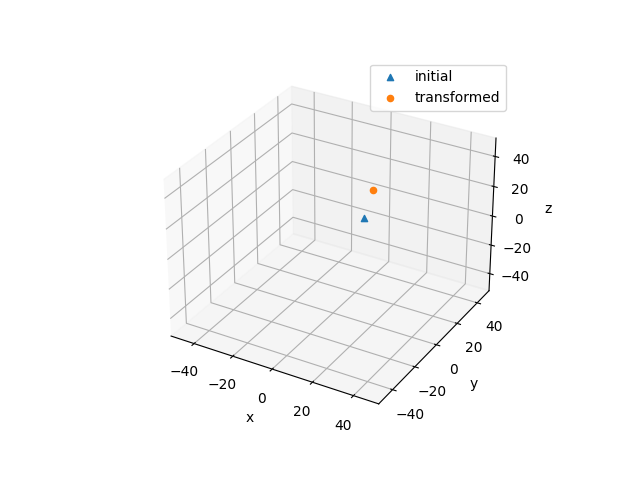

In [27]:
# coord transformation 1-3 in order
R = rz(30) @ ry(-10)
t = np.array([[0, 0, 0]]).T

origin_t = np.array([[0, 20, 0]]).T

H_t = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 20],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
])

new_origin = origin + origin_t
new_h_origin = H_t @ h_origin

H = np.hstack((R, t))
H = np.vstack((H, np.array([[0, 0, 0, 1]])))

basis_x3 = R @ basis_x
h_basis_x3 = H @ h_basis_x

basis_y3 = R @ basis_y
h_basis_y3 = H @ h_basis_y

basis_z3 = R @ basis_z
h_basis_z3 = H @ h_basis_z

basis = np.hstack((basis_x3, basis_y3, basis_z3))

h_basis = np.hstack((h_basis_x3[:-1], h_basis_y3[:-1], h_basis_z3[:-1], np.array([[0, 0, 0]]).T))
h_basis = np.vstack((h_basis, np.array([[0., 0., 0., 1.]])))

T = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [0, 0, 0]])
T = np.hstack((T, new_h_origin))

coord_point4 = basis @ reg_point + new_origin
# coord_h_point4 = h_basis @ reg_h_point + new_h_origin
coord_h_point4 = T @ (h_basis @ reg_h_point)

%matplotlib widget
plot(reg_h_point, coord_h_point4)